## Importing Libraries 

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing 

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\valid', #Full path to the valid folder
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

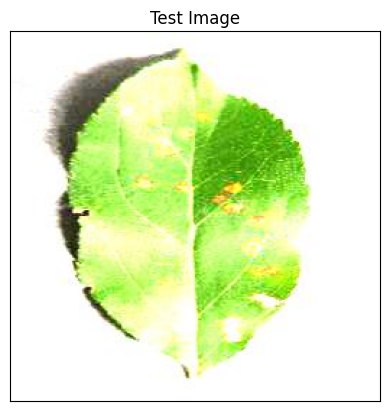

In [4]:
#Test Image Visualization
import cv2
image_path =image_path = r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\test\test\AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 14s 14s/step


In [6]:
print(predictions)

[[1.3122764e-13 2.9151676e-14 9.9999952e-01 2.3650989e-16 2.1649921e-11
  9.5885637e-13 2.2566307e-15 1.0880487e-12 6.6305284e-16 2.7159781e-16
  1.8574045e-19 5.9011997e-11 6.6409551e-13 2.2766660e-14 3.9014628e-13
  9.0692312e-14 3.6438121e-13 4.1848266e-14 9.3509152e-13 3.8035443e-11
  3.6238331e-15 1.9035518e-16 1.9906249e-13 3.9502186e-12 6.5396171e-17
  5.0681184e-16 9.5577727e-14 7.7365362e-17 4.6406464e-07 5.8687714e-11
  3.8320819e-11 7.3977672e-15 1.1713825e-13 1.6429749e-16 3.1688241e-10
  1.6091480e-09 3.7590236e-11 2.0214230e-11]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


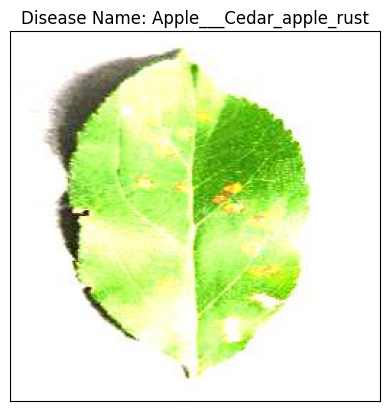

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

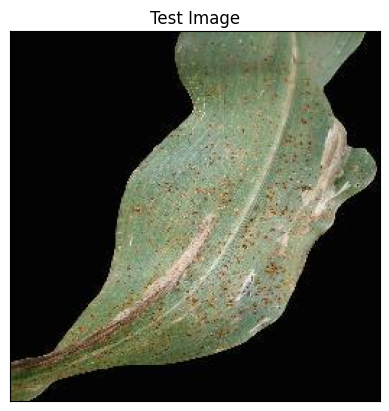

In [9]:
#Test Image Visualization
import cv2
image_path =image_path = r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\test\test\CornCommonRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 96ms/step


In [11]:
print(predictions)

[[1.64488147e-13 1.28675168e-15 2.38192378e-15 2.67230044e-17
  1.08786093e-15 1.35922001e-16 4.83307859e-18 6.41635996e-14
  1.00000000e+00 8.56932115e-17 1.71791442e-15 1.35005004e-20
  2.54211689e-18 4.28044745e-19 1.88013064e-20 6.29924093e-19
  1.68833780e-19 4.80164694e-21 2.65646769e-15 5.49633492e-17
  3.10099928e-13 1.22613234e-23 1.29128899e-17 1.98832934e-21
  1.12371355e-21 1.10464123e-17 1.28126389e-18 6.98398446e-21
  5.41926553e-23 2.48244499e-16 2.84895968e-10 3.48466997e-18
  1.85093449e-18 8.24382372e-27 7.82443712e-21 7.48637077e-23
  1.43397040e-22 1.37694735e-17]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


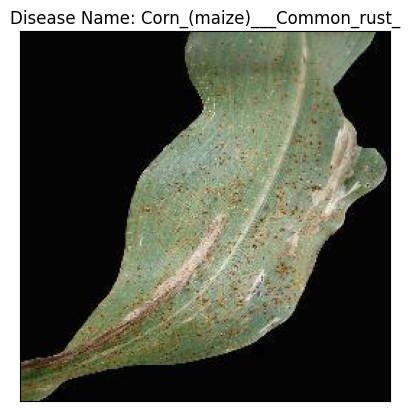

In [13]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

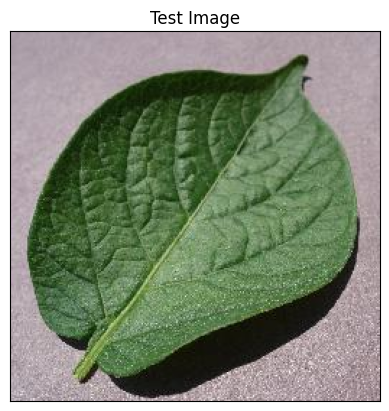

In [14]:
#Test Image Visualization
import cv2
image_path =image_path = r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\test\test\PotatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 88ms/step


In [16]:
print(predictions)

[[2.3134830e-09 7.1909149e-08 1.9690671e-10 2.6158500e-04 6.0540529e-08
  3.3932173e-07 3.1437023e-04 3.3514372e-11 4.8223793e-11 2.6536079e-11
  1.9917675e-11 1.3021742e-10 9.1311347e-10 3.1321341e-11 6.1970351e-10
  1.2482335e-08 9.4321049e-09 1.3549938e-08 4.7509744e-08 5.0311803e-05
  5.6669645e-08 8.1836297e-06 9.9936157e-01 3.2830854e-08 2.9504226e-06
  5.5811727e-11 2.2238471e-11 4.3318881e-08 5.9598430e-11 4.0571306e-09
  1.9198025e-07 4.0974119e-10 4.8385260e-09 2.9559197e-10 1.6732267e-07
  8.3990370e-11 3.0983254e-11 9.1838837e-10]]


In [17]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


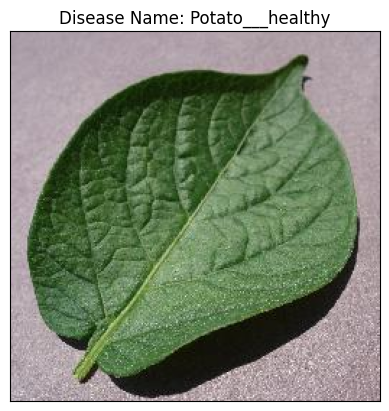

In [18]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

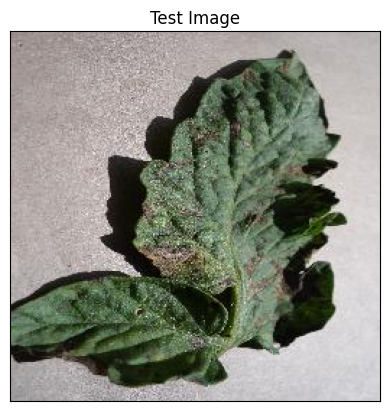

In [19]:
#Test Image Visualization
import cv2
image_path =image_path = r'C:\Users\DELL\Downloads\Project Exhibition II\extracts\Plant_Disease_Dataset\Plant_Disease_Dataset\test\test\TomatoEarlyBlight5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 75ms/step


In [21]:
print(predictions)

[[8.7010590e-12 8.1075719e-12 1.1601656e-10 5.5155177e-12 3.0160722e-14
  6.4640768e-13 3.2316240e-13 2.6785497e-12 9.7133575e-13 2.0678871e-14
  7.5664004e-17 4.1714865e-12 2.9579583e-09 1.7858683e-12 8.1132051e-15
  6.0292915e-15 9.4505506e-12 7.5948497e-11 5.6610667e-12 4.6508408e-13
  2.7899313e-11 1.1074104e-12 1.9039134e-12 2.5039053e-14 6.4893210e-15
  2.9477678e-14 1.2080869e-11 9.0536285e-15 3.3442685e-10 9.9999869e-01
  1.1710014e-06 5.8850680e-10 9.1050246e-08 9.0401707e-11 1.3180130e-08
  2.0050316e-12 4.5953225e-10 7.9744883e-10]]


In [22]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


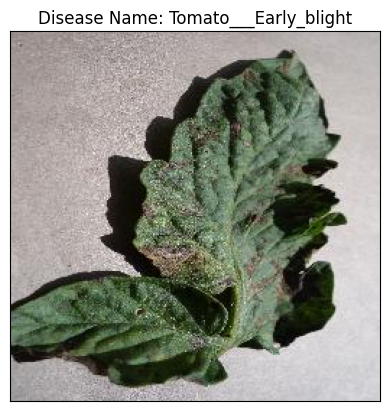

In [23]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()